## Exploratory Data Analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
df = pd.read_csv('../data/processed/final_ml_dataset.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,support_calls,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,2,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,2,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2,1


Basic structure of data

In [3]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 7043
Columns: 22


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   str    
 1   gender             7043 non-null   str    
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   str    
 4   dependents         7043 non-null   str    
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   str    
 7   multiple_lines     7043 non-null   str    
 8   internet_service   7043 non-null   str    
 9   online_security    7043 non-null   str    
 10  online_backup      7043 non-null   str    
 11  device_protection  7043 non-null   str    
 12  tech_support       7043 non-null   str    
 13  streaming_tv       7043 non-null   str    
 14  streaming_movies   7043 non-null   str    
 15  contract           7043 non-null   str    
 16  paperless_billing  7043 non-null   

In [5]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges,support_calls,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,1.286668,0.265370
std,0.368612,24.559481,30.090047,2265.270398,1.370678,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,2.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,1.000000


Check missing values

In [6]:
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
support_calls        0
churn                0
dtype: int64

Check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

Target Variable Analysis

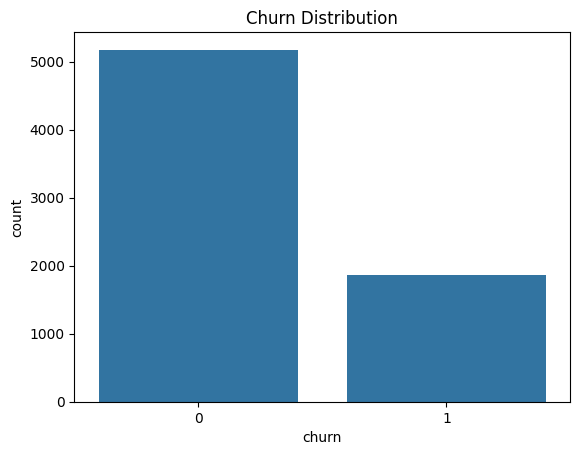

In [8]:
sns.countplot(x = 'churn', data = df)
plt.title('Churn Distribution')
plt.show()

In [9]:
df['churn'].value_counts(normalize = True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Numerical Features Analysis

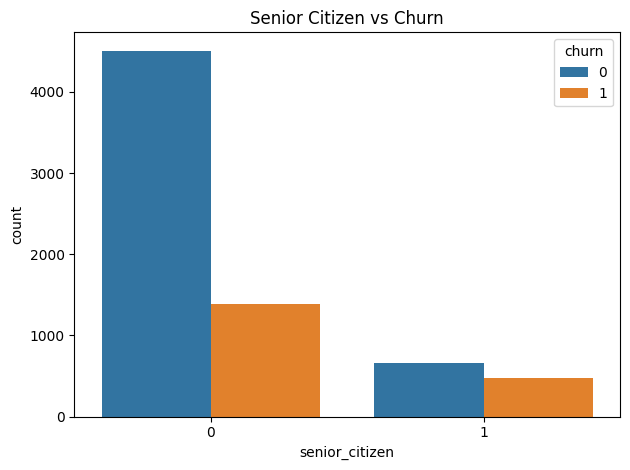

In [10]:
sns.countplot(data = df, x = 'senior_citizen', hue = 'churn')
plt.title(f'Senior Citizen vs Churn')
plt.tight_layout()
plt.show()

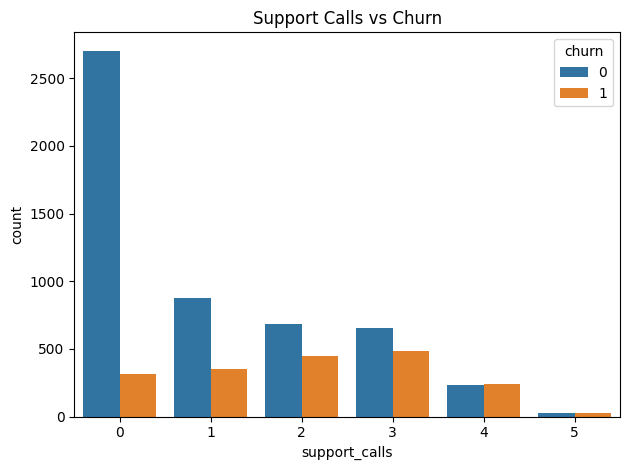

In [11]:
sns.countplot(data = df, x = 'support_calls', hue = 'churn')
plt.title(f'Support Calls vs Churn')
plt.tight_layout()
plt.show()

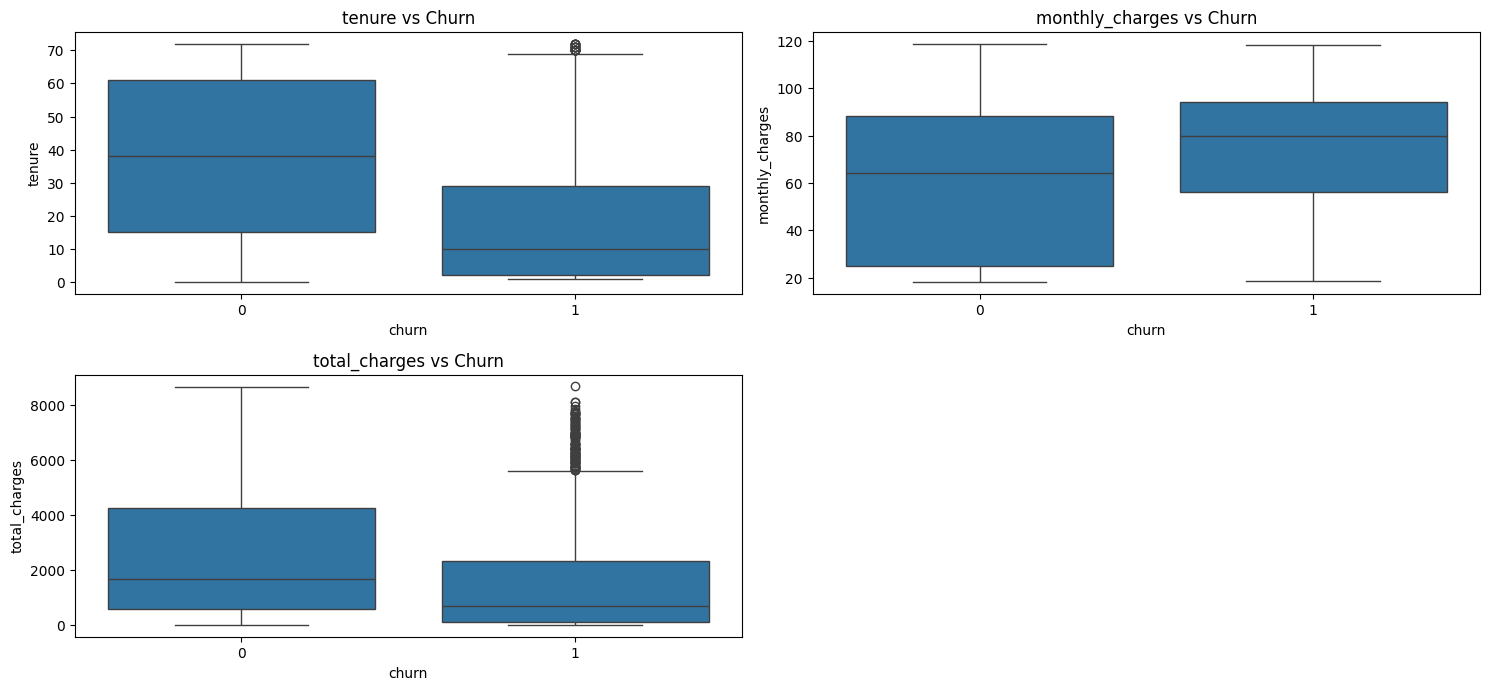

In [12]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(['tenure', 'monthly_charges', 'total_charges'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data = df, x = 'churn', y = col)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

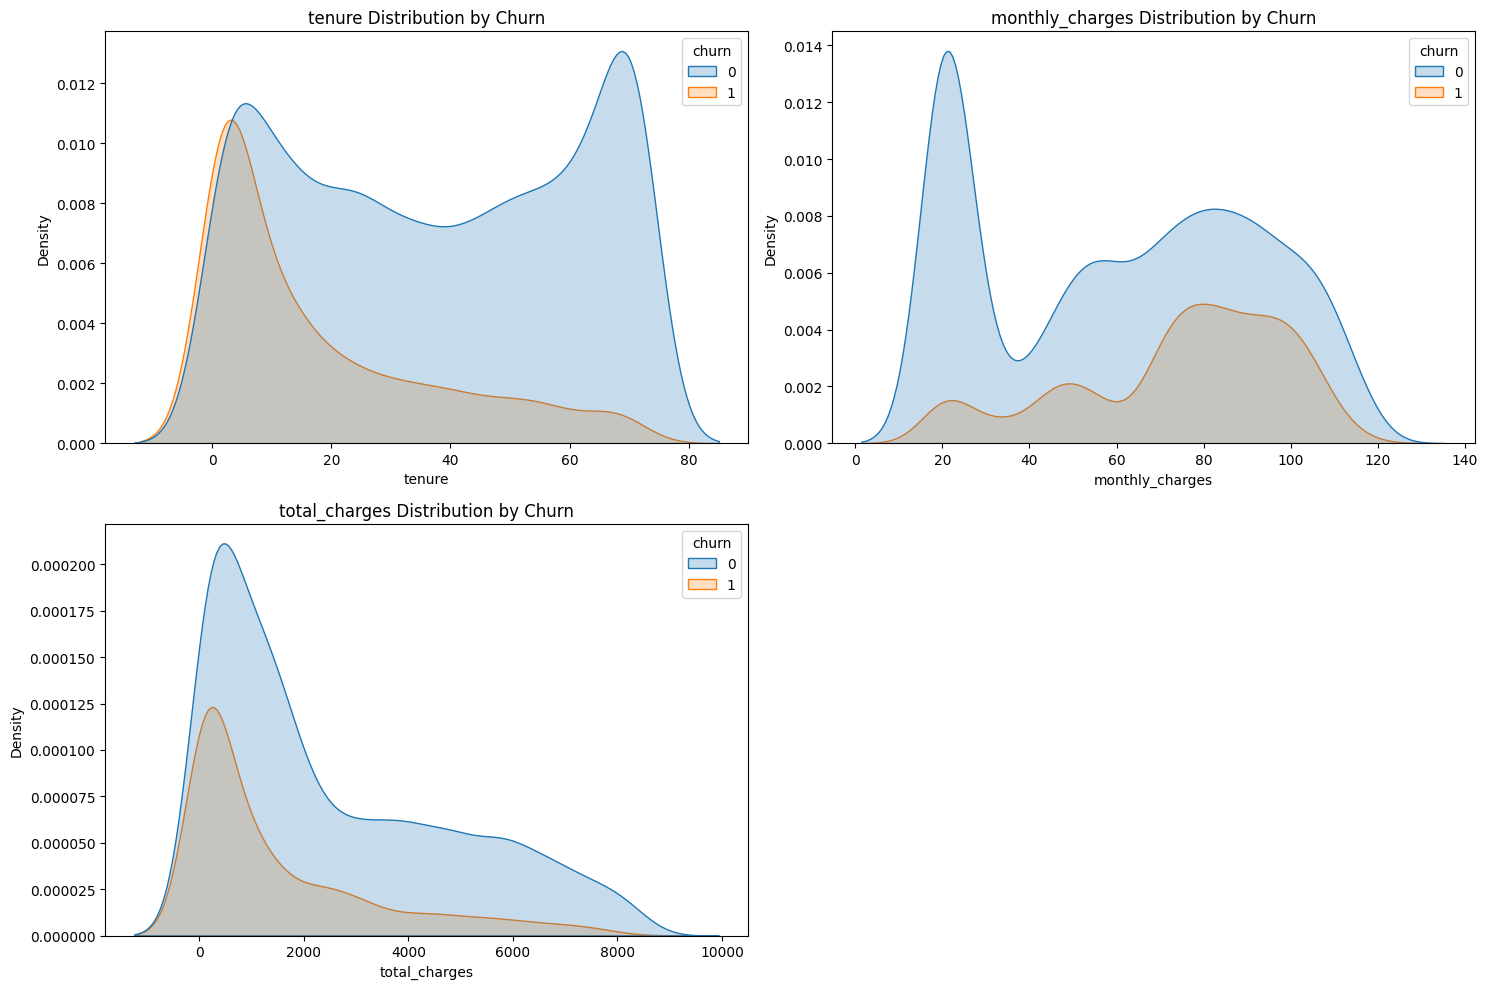

In [13]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(['tenure', 'monthly_charges', 'total_charges'], 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data = df, x = col, hue = 'churn', fill = True)
    plt.title(f'{col} Distribution by Churn')

plt.tight_layout()
plt.show()


Categorical Feature Analysis

In [14]:
categorical_cols = [
    "gender",
    "partner",
    "dependents",
    "phone_service",
    "multiple_lines",
    "internet_service",
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "contract",
    "paperless_billing",
    "payment_method"
]


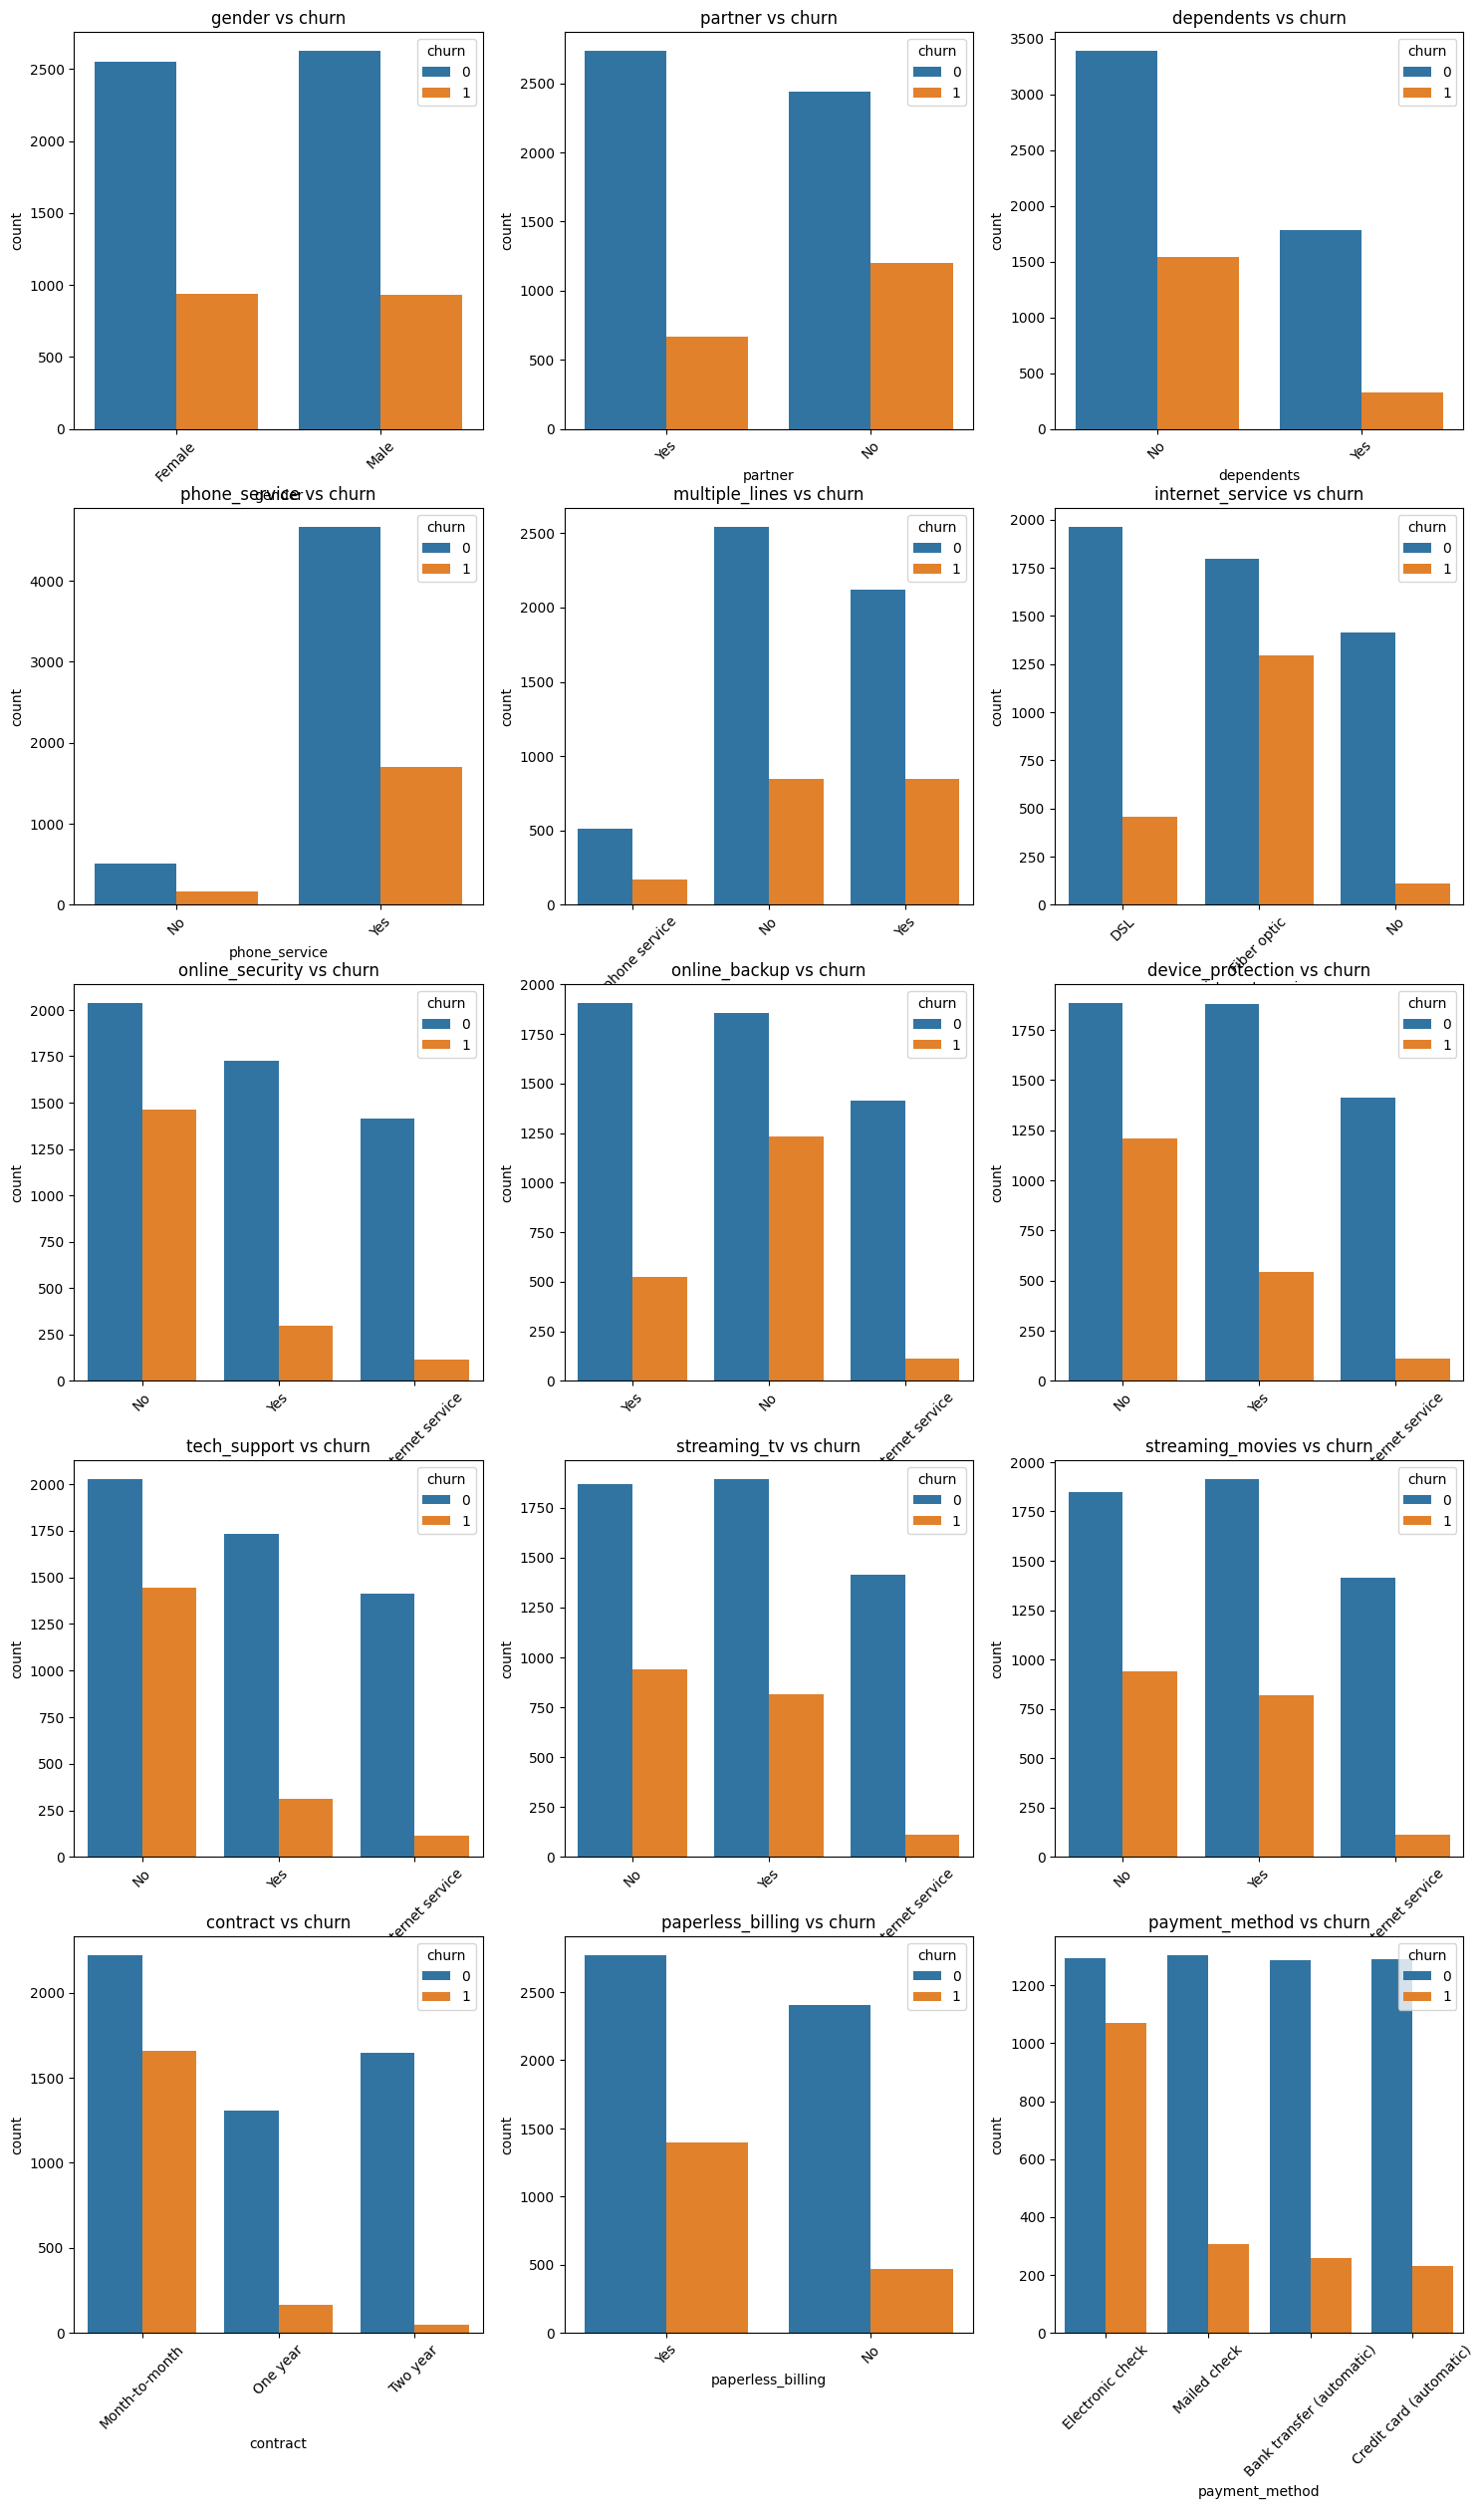

In [15]:
plt.figure(figsize=(18, 30))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x = col, data = df, hue = 'churn')
    plt.xticks(rotation = 45)
    plt.title(f'{col} vs churn')
plt.show()

In [16]:
# Exploratory Data Analysis (EDA) - Key Insights
#-----------------------------------------------


# 1. Overall Churn Distribution.
#-----------------------------------------------

# Approximately 27% of customers have churned.
# Around 73% of customers are retained.
# The dataset shows moderate class imbalance.
# Churn is significant enough to impact overall business revenue.


# 2. Tenure Analysis
#-----------------------------------------------

# Customers with low tenure (0–12 months) have the highest churn rate.
# Long-term customers (24+ months) rarely churn.
# Churn probability decreases as tenure increases.
# Short tenure is one of the strongest churn indicators.

# Business Insight:
# Early-stage customer engagement is critical for retention.


# 3. Contract Type
#-----------------------------------------------

# Month-to-month contract customers show the highest churn.
# One-year contracts have moderate churn.
# Two-year contracts have the lowest churn.
# Long-term contracts significantly improve retention.

# Business Insight:
# Encouraging longer contract commitments can reduce churn.

# 4. Monthly Charges
#-----------------------------------------------

# Customers with higher monthly charges are more likely to churn.
# High-paying customers show higher price sensitivity.
# Pricing strategy impacts retention.

# Business Insight:
# Offer loyalty discounts or bundled packages to high-bill customers.

# 5. Total Charges
#-----------------------------------------------

# Churned customers typically have lower total charges.
# This is mainly because they have shorter tenure.
# Lifetime value is lost when customers churn early.

# Business Insight:
# Focus on retaining customers during the early months.

# 6. Internet Service Type
#-----------------------------------------------

# Fiber optic customers show higher churn compared to DSL.
# Customers without internet service churn less.
# Service quality or pricing may influence fiber churn.

# Business Insight:
# Improve fiber service experience and competitive pricing.

# 7. Add-On Services (Tech Support, Security, Backup)
#-----------------------------------------------

# Customers without tech support churn more.
# Customers without online security churn more.
# Customers without device protection churn more.
# Value-added services reduce churn probability.

# Business Insight:
# Bundling additional services improves customer retention.

# 8. Payment Method
#-----------------------------------------------

# Customers using electronic check show the highest churn.
# Customers using automatic bank transfer or credit card churn less.
# Manual payment methods correlate with higher churn.

# Business Insight:
# Promote automatic payment methods for better retention.

# 9. Paperless Billing
#-----------------------------------------------

# Paperless billing users show slightly higher churn.
# May indicate digitally active customers who switch easily.

# Business Insight:
# Enhance digital engagement and loyalty campaigns.

# 10. Support Calls (If Included)
#-----------------------------------------------

# Customers with more support calls show higher churn.
# Frequent service issues correlate with churn.
# Dissatisfaction strongly impacts retention.

# Business Insight:
# Proactively monitor high-contact customers to prevent churn.

# 11. Senior Citizen Segment
#-----------------------------------------------

# Senior citizens show slightly higher churn rates.
# Demographic segments may require tailored engagement strategies.

# Business Insight:
# Design targeted retention campaigns for vulnerable segments.

# Overall Key Churn Drivers
#-----------------------------------------------

# The strongest factors influencing churn are:
# Short tenure
# Month-to-month contracts
# Higher monthly charges
# Lack of tech support and additional services
# Frequent support interactions
# Fiber optic internet usage
# Strategic Recommendations
# Target new customers with onboarding programs.
# Encourage long-term contract upgrades.
# Offer pricing incentives for high-bill customers.
# Bundle value-added services.
# Monitor customers with frequent support complaints.
# Promote automatic payment methods.